In [1]:
#Variables Declaration

import time
import cv2
import numpy as np
from numpy import asarray
import psutil
import os
import matplotlib.pylab as plt
import sys
from PIL import Image

new_color = 5,3,192,255
old_color = 0, 0, 0, 0
width, height = 988,988
img = Image.open('me.png')
ori_img_array = asarray(img)

Source Image format: PNG
Image size: (998, 998)
Image mode: RGBA
Values of original image:
 [[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


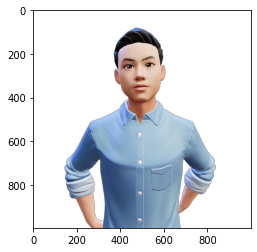

In [2]:
#Show image details

plt.imshow(img)
print("Source Image format:", img.format)
print("Image size:", img.size)
print("Image mode:", img.mode)
numpyraw = asarray(img)  
#np.set_printoptions(threshold=sys.maxsize)
np.save('bbb.npy',numpyraw)
print("Values of original image:\n",numpyraw[0:1,0:3])  

Some contents of numpy file:
 [[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


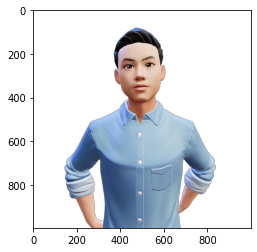

In [3]:
#Show image using numpy integers

numpyraw = np.load('bbb.npy')
print("Some contents of numpy file:\n",numpyraw[0:1,0:3])
plt.imshow(numpyraw)

Values of original image:
 [[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]

Values of tampered image:
 [[[  5   3 192 255]
  [  5   3 192 255]
  [  5   3 192 255]]]
Time Taken:1.7054669857025146


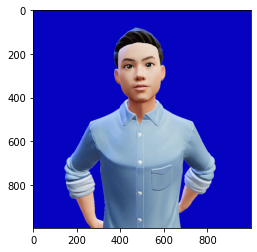

In [4]:
#Replace colour with specific pixel number using putpixel() fn

start=time.time()
imgtmp = img
width, height = imgtmp.size
pix = img.load()
for x in range(0, width):
        for y in range(0, height):
            if pix[x,y] == old_color:
                imgtmp.putpixel((x, y), new_color)
plt.imshow(imgtmp)
tampered_img_array = asarray(imgtmp)
print("Values of original image:\n",ori_img_array[0:1,0:3])    
print("\nValues of tampered image:\n",tampered_img_array[0:1,0:3])

end = time.time()
print("Time Taken:{}".format(end - start))

Values of original image:
 [[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]

Values of tampered image:
 [[[  5   3 192 255]
  [  5   3 192 255]
  [  5   3 192 255]]]
Time Taken:8.568198680877686


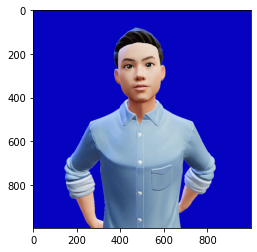

In [5]:
#Replace colour with specific numpy array

start = time.time()
numpyraw = np.load('bbb.npy')
for x in range(0, width):
        for y in range(0, height):
            if (numpyraw[x][y] == [0, 0, 0, 0]).all() :
                numpyraw[x][y] = [5,3,192,255]
print("Values of original image:\n",ori_img_array[0:1,0:3])    
print("\nValues of tampered image:\n",numpyraw[0:1,0:3])
plt.imshow(numpyraw)

end = time.time()
print("Time Taken:{}".format(end - start))

Time Taken:0.10290288925170898


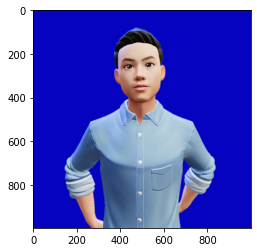

In [6]:
# Use cv2 to convert background

start = time.time()
#edges = cv2.Canny(ori_img_array, 100, 200)
#plt.imshow(edges)
masked = np.copy(ori_img_array)
lower = np.array([0,0,0,0])  
upper = np.array([0,0,0,0])

mask = cv2.inRange(masked, lower, upper)
plt.imshow(mask)
masked[mask != 0] = [5,3,192,255]
plt.imshow(masked)

end = time.time()
print("Time Taken:{}".format(end - start))

Source Image format: PNG
Image size: (7984, 7984)
Image mode: RGBA


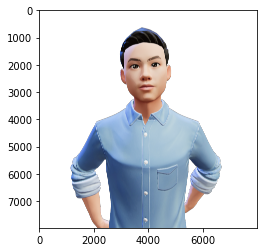

In [7]:
#Increase resolution of the image

highres1 = cv2.pyrUp(ori_img_array)
highres2 = cv2.pyrUp(highres1)
highres3 = cv2.pyrUp(highres2)

plt.imshow(highres3)
Image.fromarray(highres3).save('me2.png')
img = Image.open('me2.png')
new_img_array = asarray(img)
print("Source Image format:", img.format)
print("Image size:", img.size)
print("Image mode:", img.mode)